# Assignment: Decision trees and random forests
-------------------------------------------------------------------------------------------------------


# I. Business Understanding
## Introduction
Phishing is a common cybersecurity threat where fraudulent websites mimic legitimate ones to steal sensitive information. Identifying phishing sites is crucial for protecting users from scams. In this assignment, we explore machine learning techniques to detect phishing websites using decision trees and random forests.

### Objectives
The objectives of this assignment are:

 - To learn to use decision trees to build a transparent, human-readable predictive model.
 - To learn use random forests for improving predictive performance.
 - To provide instructions for our decision tree so that an engineer who is aware of the basics of internet technology can understand it.

# II. Data Understanding
This dataset is about phishing sites, which are websites that try to trick people into revealing their personal information. The dataset contains 11055 instances and 30 attributes. The target variable is the class attribute, which has three possible values: 1 phishing websites for , -1 for legitimate websites. The dataset is available at the UCI Machine Learning Repository.


# III. Data Preparation

We are getting the data from the UCI Machine Learning Repository.

In [175]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

y = y.values.ravel()
df = pd.DataFrame(X)
df.head(20)

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,-1,1,0,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,0,-1,1,0,1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,1,1,0,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,1,-1,0,-1,1,0,1


# Part 1
- We split the data into training, and testing sets:

In [176]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# IV-I. Modeling (Decision Trees)


In [177]:
model = DecisionTreeClassifier(max_depth=4, random_state=50)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=50)

## Image of the Decision Tree

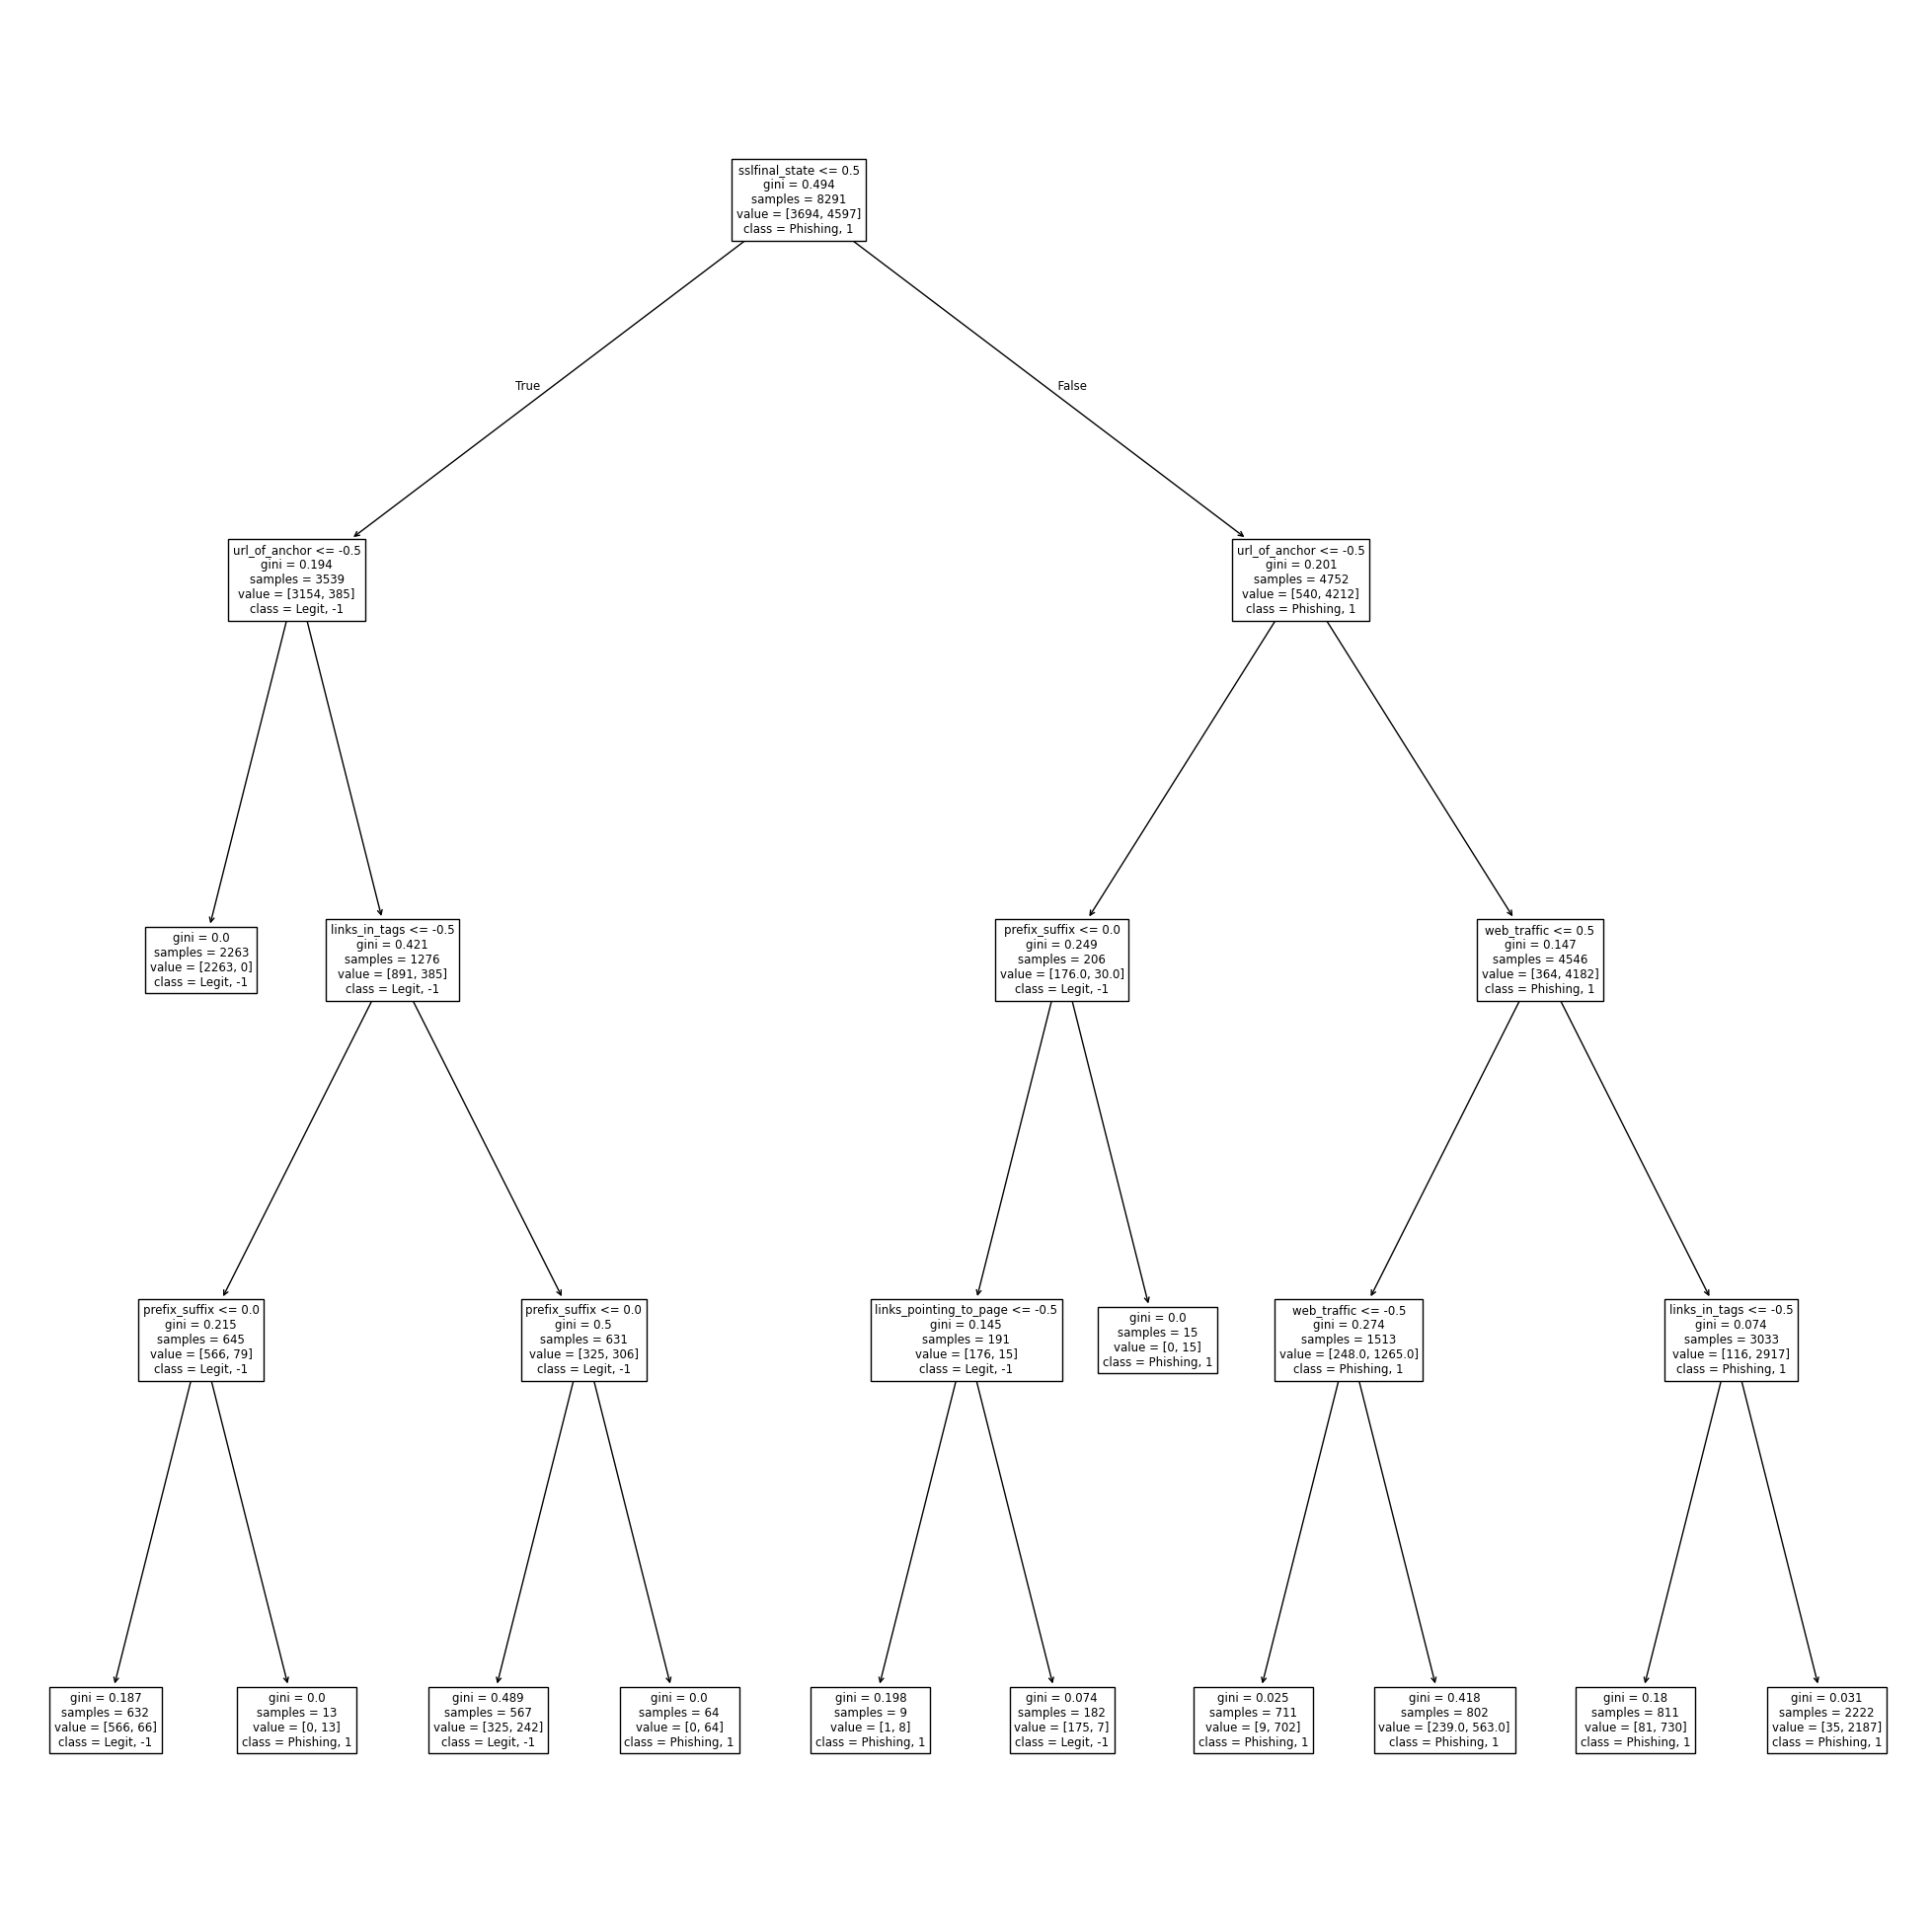

In [178]:
fig = plt.figure(figsize=(25,25))
plot_tree(model, feature_names = X.keys(), class_names=['Legit, -1', 'Phishing, 1'])
plt.show()


# V-I: Evaluation ( Decision Tree )

Confusion matrix:
[[1094  110]
 [ 118 1442]]
              precision    recall  f1-score   support

       legit       0.90      0.91      0.91      1204
    Phishing       0.93      0.92      0.93      1560

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



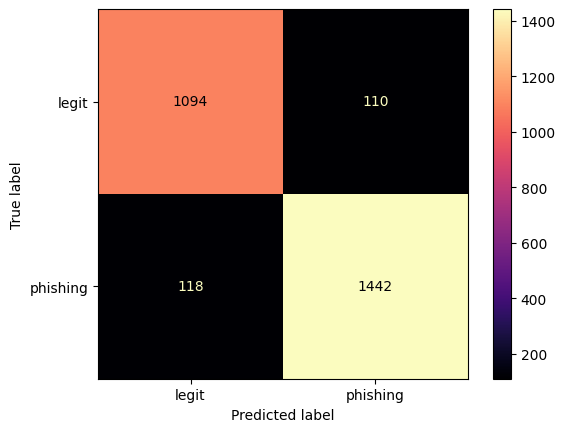

In [179]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict(X_test)
print(f'Confusion matrix:\n{confusion_matrix(y_test, Y_pred)}')
print(classification_report(y_test, Y_pred, target_names=["legit", "Phishing"]))

confusionmatriximage = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_pred),display_labels=["legit" ,"phishing"])
confusionmatriximage.plot(cmap="magma")

## Instructions

### Instructions for Determining If a Website Is a Phishing Site
Follow these steps in order, using the website's characteristics to determine if it is phishing or legitimate.

1. Check sslfinal_state (SSL/TLS final state):

  * If sslfinal_state <= 0.5, proceed to step 2.
  * Otherwise, proceed to step 6.

2. Check url_of_anchor (percentage of suspicious anchor tags in links):
  
  * If url_of_anchor <= -0.5, proceed to step 3.
  * Otherwise, proceed to step 4.

3. Check links_in_tags (proportion of suspicious links inside HTML tags):

  * If links_in_tags <= -0.5, classify as Legitimate.
  * Otherwise, classify as Phishing.

4. Check prefix_suffix (whether the URL has a prefix/suffix, like hyphens in domain names):

  * If prefix_suffix <= 0.0, classify as Legitimate.
  * Otherwise, classify as Phishing.

5. Check links_pointing_to_page (ratio of links pointing to the same domain):

  * If links_pointing_to_page <= -0.5, classify as Legitimate.
  * Otherwise, classify as Phishing.

6. Check web_traffic (Alexa ranking or similar traffic measure):

  * If web_traffic <= 0.5, proceed to step 7.
  * Otherwise, classify as Phishing.

7. Check prefix_suffix again:

  * If prefix_suffix <= 0.0, proceed to step 8.
  * Otherwise, classify as Phishing.

8. Check links_pointing_to_page again:

  * If links_pointing_to_page <= -0.5, classify as Legitimate.
  * Otherwise, classify as Phishing.

# IV-II. Modeling (Random Forests)

# Part 2

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create random forest classifier
modelForest = RandomForestClassifier(n_estimators=100, max_depth=4 ,bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123)
modelForest.fit(X, y)

cv_scores = cross_val_score(modelForest, X, y, cv=10)

# Print results
print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')

Fold-specific accuracies: [0.90867993 0.90958409 0.91862568 0.9159132  0.92857143 0.93122172
 0.91855204 0.91493213 0.92579186 0.92579186]
Overall accuracy (avg. of folds): 0.9198


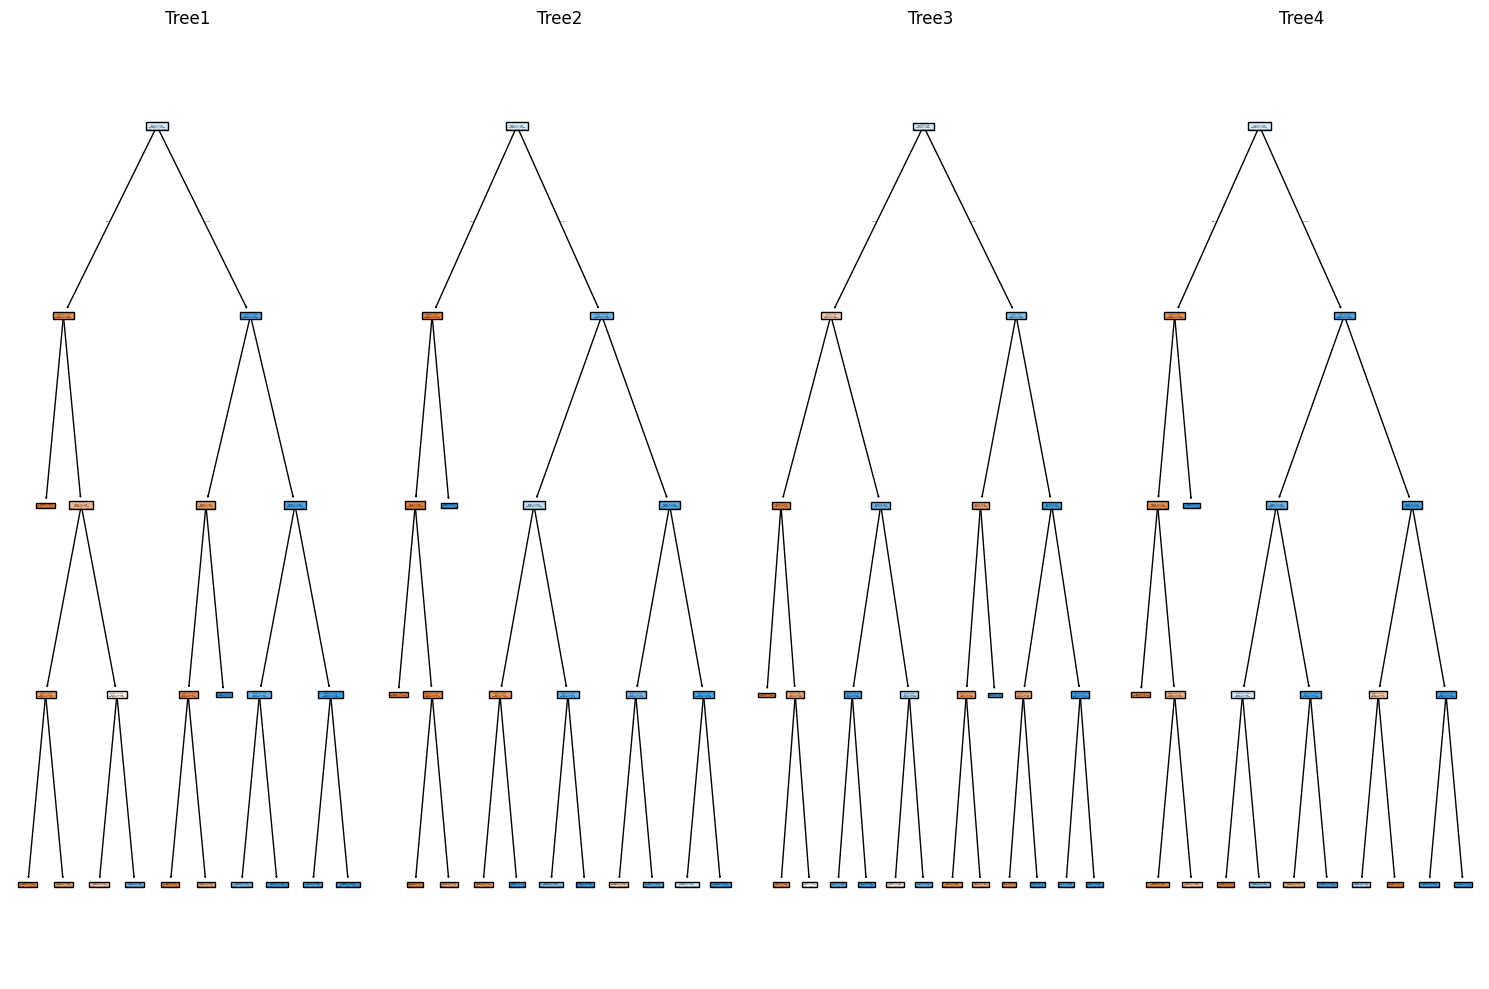

In [181]:
number_of_trees = 4


plt.figure(figsize=(15, 10))

for i in range(number_of_trees):
    plt.subplot(1, number_of_trees, i + 1)
    plot_tree(modelForest.estimators_[i], filled=True,
              feature_names=phishing_websites.feature_names, class_names=phishing_websites.target_names)
    plt.title(f'Tree{i + 1}')

plt.tight_layout()
plt.show()

# V-II. Evaluation (Random Forests)

Confusion matrix:
[[1093  111]
 [  97 1463]]
              precision    recall  f1-score   support

       legit       0.92      0.91      0.91      1204
    Phishing       0.93      0.94      0.93      1560

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



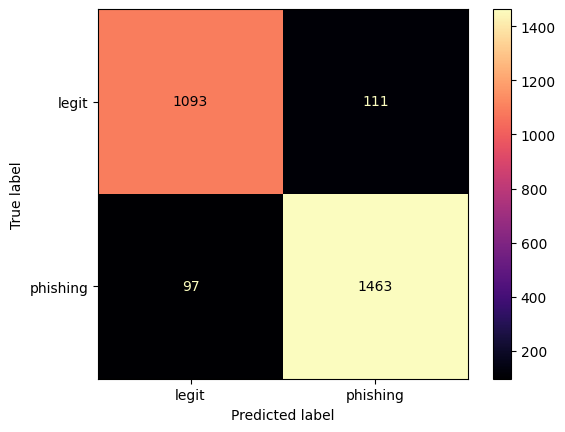

In [182]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
Y_pred = modelForest.predict(X_test)
print(f'Confusion matrix:\n{confusion_matrix(y_test, Y_pred)}')
print(classification_report(y_test, Y_pred, target_names=["legit", "Phishing"]))

confusionmatriximageForest = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_pred),display_labels=["legit" ,"phishing"])
confusionmatriximageForest.plot(cmap="magma")

# VI. Deployment
### Conclusion
In this assignment, we used decision trees and random forests to detect phishing websites. We provided instructions for our decision tree so that an engineer who is aware of the basics of internet technology can understand it. Final model can be used to classify websites as phishing or legitimate based on their characteristics. Before using we would suggest to test the model on a test set to evaluate its performance. Also try to improve the model by tuning hyperparameters.